In [283]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.metrics import accuracy_score

# KLASIFIKACIJA KNN algoritmom

Za svaku supstancu postoji vise klasa koje mogu da se klasifikuju, stoga radice se klasifikacija svake supstance posebno

### UCITAVANJE I PREPROCESIRANJE PODATAKA
*deo koda uzet iz fajla za analizu podataka*

In [284]:
sirovi_podaci = pd.read_csv('drug_consumption.data')
sirovi_podaci #fale imena atributa

#procitano sa sajtu podataka 
kolone = ["ID", "Age", "Gender", "Education", "Country", "Ethnicity", 
            "Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsiveness", "SS", 
            "Alchocol", "Amphet", "Amyl", "Benzos", "Caff", "Canabis", "Choc", "Coke", "Crack", "Ecstasy", 
            "Heroin", "Ketamin", "LegalH", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"]

sirovi_podaci = pd.read_csv('drug_consumption.data', names = kolone)

podaci = sirovi_podaci.copy()

#ID mi ne igra nikakvu ulogu svakako
podaci = podaci.drop('ID', axis = 1)


In [285]:
podaci
print(f'Broj istanci: {podaci.shape[0]}')
print(f'Broj atributa: {podaci.shape[1]}')
podaci.describe()

Broj istanci: 1885
Broj atributa: 31


,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsiveness,SS
count,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [286]:
podaci.isna().any().any() #nema nedostajucih vrednosti, sto je dobro

False

In [287]:
# posto imamo vise klasa koje ispitujemo, razdvajam podatke na atribute i na klase
podaci.head()

#izdvajanje atributa
atributi1 = podaci.columns
atributi1

atributi = []
for atribut in atributi1:
    if atribut == 'Alchocol':
        break
    atributi.append(atribut)
    
print(atributi, end = ', ')

['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsiveness', 'SS'], 

In [288]:
#izdvajanje klasa
klase = []
for atribut in atributi1:
    if atribut not in atributi:
        klase.append(atribut)
        
print(klase, end = ', ')
print()

# provera deljenja kolona
print(len(klase) + len(atributi) == len(podaci.columns))

['Alchocol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Canabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamin', 'LegalH', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA'], 
True


In [289]:
#skaliramo podatke, trebace zbog KNN-a
def skaliraj_podatke(X):
    return (X - min(X))/(max(X) - min(X))

In [290]:
skalirani_podaci = podaci.copy()
for a in atributi:
    skalirani_podaci[a] = skaliraj_podatke(skalirani_podaci[a])
    
#provera uspesnosti skaliranja
for a in atributi:
    print(len(skalirani_podaci[a].unique()) == len(podaci[a].unique()), end = ", ")
    
#nismo izgubili podatke

True, True, True, True, True, True, True, True, True, True, True, True, 

In [291]:
podaci_skalirano = skalirani_podaci.copy()

In [292]:
for x in klase:
    podaci_skalirano = podaci_skalirano.drop(x, axis = 1)
podaci_skalirano

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsiveness,SS
0,0.409137,1.0,0.537681,1.000000,0.409061,0.560562,0.412116,0.435690,0.367654,0.499040,0.428474,0.224398
1,0.246475,0.0,1.000000,1.000000,0.262143,0.413474,0.796106,0.762567,0.609827,0.479394,0.337920,0.465658
2,0.409137,0.0,0.537681,1.000000,0.262143,0.444788,0.622976,0.392939,0.266061,0.353580,0.215401,0.619957
3,0.000000,1.0,0.814329,1.000000,0.262143,0.492045,0.376883,0.527023,0.585213,0.584415,0.215401,0.224398
4,0.409137,1.0,1.000000,1.000000,0.262143,0.623275,0.250544,0.456995,0.456454,0.688508,0.428474,0.465658
...,...,...,...,...,...,...,...,...,...,...,...,...
1880,0.000000,1.0,0.412820,0.000000,0.262143,0.336890,0.765875,0.835399,0.609827,0.335773,0.629735,1.000000
1881,0.000000,0.0,0.412820,0.000000,0.262143,0.477550,0.765875,0.624600,0.609827,0.280854,0.629735,0.710933
1882,0.246475,1.0,0.653938,0.000000,0.262143,0.682246,0.289795,0.323599,0.244253,0.300104,0.565343,0.388117
1883,0.000000,1.0,0.412820,0.000000,0.262143,0.649318,0.206510,0.577652,0.266061,0.128634,0.705068,0.825752


# KLASIFIKACIJA 

In [293]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# POMOCNA FJA ZA GRAFICKI PRIKAZ, kod uzet sa vezbi
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.metrics import classification_report_imbalanced
from termcolor import colored, cprint


def report_imbalanced(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print(colored("Classification report for model {} on {} data".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report_imbalanced(y, y_pred, zero_division=True))
    print("---------------------------------------------------------------------------------")
    
#     vrste = ['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6']
    kolone = ['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6']
    print(colored("Confusion matrix for model {} on {} data ".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns = kolone, index = kolone))
    print("---------------------------------------------------------------------------------")

def report(model, x, y, text = "trening", ):
    y_pred = model.predict(x)
    
    print(colored('\t' + f'Klasifikacioni izveštaj za model {type(model).__name__} nad {text} podacima', 'blue', attrs= ['bold']))
    cprint('----------------------------------------------------------------------------------------------', attrs= ['bold'])
    cprint(classification_report(y, y_pred), attrs= ['dark']) 
    cprint('----------------------------------------------------------------------------------------------', attrs= ['bold'])

In [294]:
X, y = podaci_skalirano, podaci['Alchocol']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 42)

In [295]:
knn = KNeighborsClassifier(n_neighbors = 80)

In [296]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=80)

In [297]:
report_imbalanced(knn, X_train, y_train)

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

        CL0       1.00      0.00      1.00      0.00      0.00      0.00        24
        CL1       1.00      0.00      1.00      0.00      0.00      0.00        24
        CL2       1.00      0.00      1.00      0.00      0.00      0.00        48
        CL3       0.38      0.02      1.00      0.04      0.15      0.02       138
        CL4       0.25      0.00      1.00      0.01      0.07      0.00       201
        CL5       0.41      0.95      0.07      0.57      0.26      0.08       531
        CL6       0.40      0.08      0.95      0.14      0.28      0.07       353

avg / total       0.42      0.41      0.61      0.27      0.21      0.05      1319

---------------------------------------------------------------------------------
Confusion matrix

In [298]:
report_imbalanced(knn, X_test, y_test)

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

        CL0       1.00      0.00      1.00      0.00      0.00      0.00        10
        CL1       1.00      0.00      1.00      0.00      0.00      0.00        10
        CL2       1.00      0.00      1.00      0.00      0.00      0.00        20
        CL3       0.00      0.00      1.00      0.00      0.00      0.00        60
        CL4       1.00      0.00      1.00      0.00      0.00      0.00        86
        CL5       0.39      0.91      0.05      0.55      0.21      0.05       228
        CL6       0.23      0.05      0.93      0.09      0.22      0.04       152

avg / total       0.44      0.38      0.60      0.24      0.15      0.03       566

---------------------------------------------------------------------------------
Confusion matrix

radi slicno kao stabla

In [299]:
# cackanje parametara
parametri = {
    'n_neighbors' : [x for x in range(4, 20)],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'kd_tree']
}

In [300]:
grid = GridSearchCV(knn, param_grid = parametri, scoring='accuracy', cv=3, verbose=4)

In [301]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV 1/3] END algorithm=auto, n_neighbors=4, weights=uniform;, score=0.280 total time=   0.0s
[CV 2/3] END algorithm=auto, n_neighbors=4, weights=uniform;, score=0.339 total time=   0.0s
[CV 3/3] END algorithm=auto, n_neighbors=4, weights=uniform;, score=0.298 total time=   0.0s
[CV 1/3] END algorithm=auto, n_neighbors=4, weights=distance;, score=0.323 total time=   0.0s
[CV 2/3] END algorithm=auto, n_neighbors=4, weights=distance;, score=0.352 total time=   0.0s
[CV 3/3] END algorithm=auto, n_neighbors=4, weights=distance;, score=0.292 total time=   0.0s
[CV 1/3] END algorithm=auto, n_neighbors=5, weights=uniform;, score=0.311 total time=   0.0s
[CV 2/3] END algorithm=auto, n_neighbors=5, weights=uniform;, score=0.345 total time=   0.0s
[CV 3/3] END algorithm=auto, n_neighbors=5, weights=uniform;, score=0.312 total time=   0.0s
[CV 1/3] END algorithm=auto, n_neighbors=5, weights=distance;, score=0.330 total time=   0.0s
[CV 

[CV 1/3] END algorithm=auto, n_neighbors=19, weights=distance;, score=0.357 total time=   0.0s
[CV 2/3] END algorithm=auto, n_neighbors=19, weights=distance;, score=0.380 total time=   0.0s
[CV 3/3] END algorithm=auto, n_neighbors=19, weights=distance;, score=0.376 total time=   0.0s
[CV 1/3] END algorithm=kd_tree, n_neighbors=4, weights=uniform;, score=0.280 total time=   0.0s
[CV 2/3] END algorithm=kd_tree, n_neighbors=4, weights=uniform;, score=0.339 total time=   0.0s
[CV 3/3] END algorithm=kd_tree, n_neighbors=4, weights=uniform;, score=0.298 total time=   0.0s
[CV 1/3] END algorithm=kd_tree, n_neighbors=4, weights=distance;, score=0.323 total time=   0.0s
[CV 2/3] END algorithm=kd_tree, n_neighbors=4, weights=distance;, score=0.352 total time=   0.0s
[CV 3/3] END algorithm=kd_tree, n_neighbors=4, weights=distance;, score=0.292 total time=   0.0s
[CV 1/3] END algorithm=kd_tree, n_neighbors=5, weights=uniform;, score=0.311 total time=   0.0s
[CV 2/3] END algorithm=kd_tree, n_neighb

[CV 2/3] END algorithm=kd_tree, n_neighbors=18, weights=uniform;, score=0.368 total time=   0.0s
[CV 3/3] END algorithm=kd_tree, n_neighbors=18, weights=uniform;, score=0.380 total time=   0.0s
[CV 1/3] END algorithm=kd_tree, n_neighbors=18, weights=distance;, score=0.359 total time=   0.0s
[CV 2/3] END algorithm=kd_tree, n_neighbors=18, weights=distance;, score=0.364 total time=   0.0s
[CV 3/3] END algorithm=kd_tree, n_neighbors=18, weights=distance;, score=0.383 total time=   0.0s
[CV 1/3] END algorithm=kd_tree, n_neighbors=19, weights=uniform;, score=0.359 total time=   0.0s
[CV 2/3] END algorithm=kd_tree, n_neighbors=19, weights=uniform;, score=0.361 total time=   0.0s
[CV 3/3] END algorithm=kd_tree, n_neighbors=19, weights=uniform;, score=0.385 total time=   0.0s
[CV 1/3] END algorithm=kd_tree, n_neighbors=19, weights=distance;, score=0.357 total time=   0.0s
[CV 2/3] END algorithm=kd_tree, n_neighbors=19, weights=distance;, score=0.380 total time=   0.0s
[CV 3/3] END algorithm=kd

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_neighbors=80),
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'n_neighbors': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                         15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=4)

In [302]:
ocena = grid.best_score_
najbolji_parametri = grid.best_params_

In [303]:
print(ocena, najbolji_parametri) #malo bolje radi

0.3707427348657417 {'algorithm': 'auto', 'n_neighbors': 18, 'weights': 'uniform'}


In [304]:
# balansiranje klasa

In [305]:
from collections import Counter
from matplotlib import pyplot as plt
def resample(sampler, X, Y):
    X_resampled, y_resampled = sampler.fit_resample(X, Y)
    print(colored("Number of instances before resampling with {} : {}. ".format(type(sampler).__name__,\
                                                                           Counter(Y).items()), "green"))
    print(colored("Number of instances after  resampling with {} : {}. ".format(type(sampler).__name__,\
                                                                           Counter(y_resampled).items()), "blue"))
    return X_resampled, y_resampled
    
def visualize(X, X_resampled, Y, Y_resampled, x_opacity=0.5):
    """
        x_opacity - [0, 1] -> prozirnost elemenata klase (podešavati u odnosu na to da li prikazujemo samo 1 klasu ili obe)
    """
    
    #Da bismo vizuelizovali, iskoristicemo PCA da smanjimo na 2 dimenzije
    
    pca = PCA(n_components=2)
    pca.fit(X)
    
    X_pca = pca.transform(X)
    X_resampled_pca = pca.transform(X_resampled) 
    
    X_stacked = [X_pca, X_resampled_pca]
    Y_stacked = [Y, y_resampled]
    
    fig = plt.figure(figsize=(20, 5))
    
    for i in range(2):
        ax = plt.subplot(1, 2, i + 1)
        colors = ['b' if y == -1 else 'r' for y in Y_stacked[i]]
        alpha = [x_opacity if y == -1 else 1 - x_opacity for y in Y_stacked[i]]
        plt.scatter(X_stacked[i][:, 0], X_stacked[i][:, 1], c=colors, alpha=alpha)
        plt.title('{} resampling'.format("After" if i else "Before"), c = 'blue' if i else 'green')
    plt.show()


In [306]:
def train_and_evaluate_model(X_train, Y_train, X_test, Y_test):
    model = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 18, weights='distance')
    model.fit(X_train, Y_train)
    report_imbalanced(model, X_train, Y_train)
    report_imbalanced(model, X_test, Y_test)
    return model

In [307]:
from collections import Counter

In [308]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0, sampling_strategy='minority')

Number of instances before resampling with SMOTEENN : dict_items([('CL5', 531), ('CL4', 201), ('CL6', 353), ('CL3', 138), ('CL2', 48), ('CL1', 24), ('CL0', 24)]). 
Number of instances after  resampling with SMOTEENN : dict_items([('CL0', 509), ('CL1', 519), ('CL2', 489), ('CL3', 408), ('CL4', 305), ('CL5', 35), ('CL6', 127)]). 


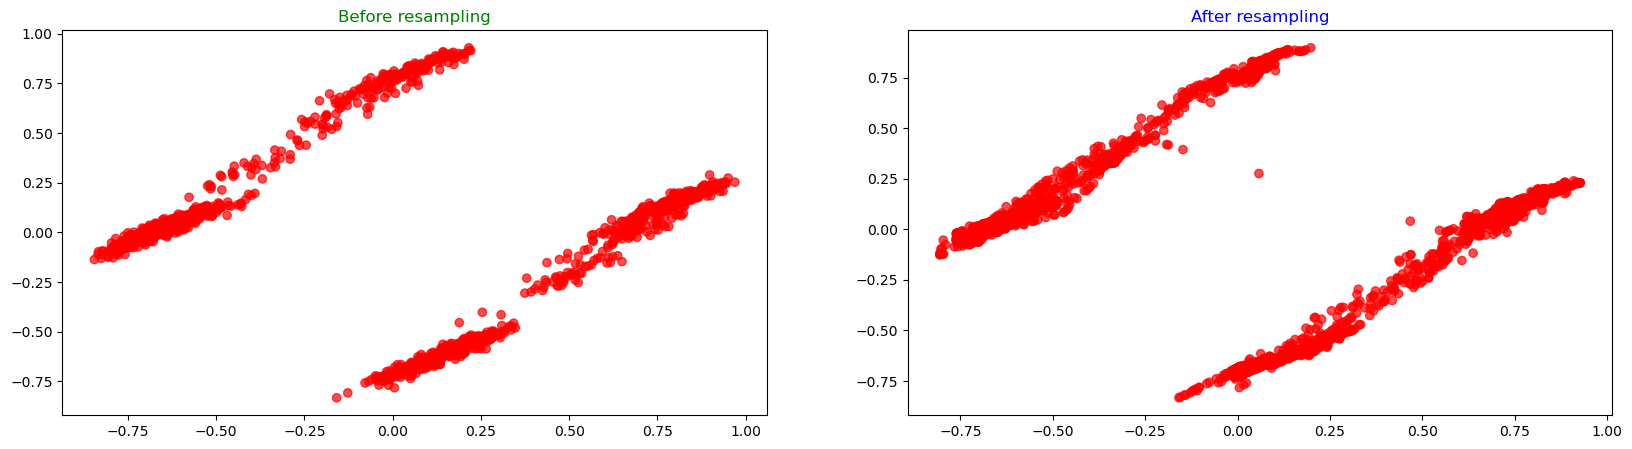

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

        CL0       1.00      1.00      1.00      1.00      1.00      1.00       509
        CL1       1.00      1.00      1.00      1.00      1.00      1.00       519
        CL2       1.00      1.00      1.00      1.00      1.00      1.00       489
        CL3       1.00      1.00      1.00      1.00      1.00      1.00       408
        CL4       1.00      1.00      1.00      1.00      1.00      1.00       305
        CL5       1.00      1.00      1.00      1.00      1.00      1.00        35
        CL6       1.00      1.00      1.00      1.00      1.00      1.00       127

avg / total       1.00      1.00      1.00      1.00      1.00      1.00      2392

---------------------------------------------------------------------------------
Confusion matrix

In [309]:
from imblearn.combine import SMOTEENN
from sklearn.neighbors import KNeighborsClassifier
smoteenn = SMOTEENN(random_state=42, sampling_strategy='auto')
X_resampled, y_resampled = resample(smoteenn, X_train, y_train)
visualize(X_train, X_resampled, y_train, y_resampled, 0.3)
model_smoteenn = train_and_evaluate_model(X_resampled, y_resampled, X_test, y_test)

In [310]:
najbolji_parametri

{'algorithm': 'auto', 'n_neighbors': 18, 'weights': 'uniform'}

In [338]:
n = len(klase)
preciznosti = []
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(podaci_skalirano, podaci[klase[i]], test_size = 0.30,  random_state = 42)
    
    knn_i = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 18, weights='uniform')
    knn_i.fit(X_train, y_train)
    print(klase[i])
    report(knn_i, X_test, y_test, text= 'test')
    
    predicted = knn_i.predict(X_test)
    preciznosti.append(accuracy_score(y_test, predicted))

Alchocol
	Klasifikacioni izveštaj za model KNeighborsClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       1.00      0.18      0.31        11
         CL1       0.00      0.00      0.00        11
         CL2       1.00      0.04      0.08        24
         CL3       0.36      0.17      0.23        60
         CL4       0.40      0.18      0.24        96
         CL5       0.47      0.88      0.61       229
         CL6       0.65      0.31      0.42       135

    accuracy                           0.48       566
   macro avg       0.55      0.25      0.27       566
weighted avg       0.51      0.48      0.42       566

----------------------------------------------------------------------------------------------
Amphet
	Klasifikacioni izveštaj za model KNeighborsClassifier nad test podacima
---------------------------------------------------

/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packa

	Klasifikacioni izveštaj za model KNeighborsClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       1.00      0.17      0.29         6
         CL1       0.00      0.00      0.00         1
         CL2       0.00      0.00      0.00         4
         CL3       0.00      0.00      0.00        15
         CL4       0.36      0.20      0.26        80
         CL5       0.48      0.53      0.51       220
         CL6       0.59      0.68      0.63       240

    accuracy                           0.52       566
   macro avg       0.35      0.23      0.24       566
weighted avg       0.50      0.52      0.50       566

----------------------------------------------------------------------------------------------
Coke
	Klasifikacioni izveštaj za model KNeighborsClassifier nad test podacima
--------------------------------------------------------------

/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packa

LegalH
	Klasifikacioni izveštaj za model KNeighborsClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.83      0.98      0.90       314
         CL1       0.00      0.00      0.00         8
         CL2       0.24      0.13      0.16        63
         CL3       0.44      0.64      0.52       104
         CL4       0.25      0.06      0.09        35
         CL5       0.50      0.04      0.08        24
         CL6       0.00      0.00      0.00        18

    accuracy                           0.68       566
   macro avg       0.32      0.26      0.25       566
weighted avg       0.61      0.68      0.62       566

----------------------------------------------------------------------------------------------
LSD
	Klasifikacioni izveštaj za model KNeighborsClassifier nad test podacima
--------------------------------------------------------

/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packa

In [339]:
preciznosti_obicno = [round(x, 4) for x in preciznosti]

In [340]:
preciznosti_obicno

[0.4823,
 0.6378,
 0.7438,
 0.6325,
 0.7385,
 0.5689,
 0.5247,
 0.6519,
 0.8728,
 0.6714,
 0.864,
 0.8145,
 0.682,
 0.689,
 0.788,
 0.636,
 0.629,
 0.9947,
 0.7721]

# pokusavam da dodam atribute koristeci i ostale klase

In [341]:
podaci_skalirano = podaci.copy()

n = len(podaci_skalirano['Heroin'])
    
for x in klase:
    for i in range(n):
        podaci_skalirano[x][i] = int(podaci_skalirano[x][i].strip('CL'))
    print(podaci_skalirano[x].unique())
        

podaci_skalirano

[5 6 4 2 1 0 3]
[2 0 1 3 5 4 6]
[0 2 1 3 5 4 6]
[2 0 3 1 4 5 6]
[6 5 4 3 0 1 2]
[0 4 3 2 1 6 5]
[5 6 4 0 3 2 1]
[0 3 2 1 6 5 4]
[0 1 2 3 5 4 6]
[0 4 1 3 2 6 5]
[0 1 2 3 5 6 4]
[0 2 3 1 5 4 6]
[0 1 2 3 5 4 6]
[0 2 1 3 4 5 6]
[0 3 1 6 4 2 5]
[0 1 2 3 4 5 6]
[2 4 0 6 1 3 5]
[0 2 3 4 1]
[0 1 3 6 2 5 4]


/tmp/ipykernel_14822/2619896397.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  podaci_skalirano[x][i] = int(podaci_skalirano[x][i].strip('CL'))


,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamin,LegalH,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,2,0,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,4,0,2,0,2,3,0,4,0,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,1,0,0,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,2,0,0,0,0,2,0,0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,1,0,0,1,0,0,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,0,0,0,3,3,0,0,0,0,5
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,2,0,0,3,5,4,4,5,0,0
1882,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,4,0,2,0,2,0,2,6,0,0
1883,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,3,0,0,3,3,0,3,4,0,0


In [342]:
# treba mi za klasifikaciju
for x in klase:
    podaci_skalirano[x] = podaci_skalirano[x].astype('float64')

In [343]:
#skaliram podatke
for a in atributi:
    podaci_skalirano[a] = skaliraj_podatke(podaci_skalirano[a])
for a in klase:
    podaci_skalirano[a] = skaliraj_podatke(podaci_skalirano[a])
podaci_skalirano.describe()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamin,LegalH,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
count,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,...,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.278405,0.499735,0.550215,0.604629,0.264556,0.514137,0.499975,0.530058,0.499965,0.499944,...,0.219010,0.062334,0.094872,0.225995,0.176923,0.137754,0.197878,0.533422,0.002387,0.072237
std,0.247867,0.500133,0.214936,0.457463,0.055146,0.148125,0.152332,0.161318,0.143957,0.143969,...,0.274595,0.172463,0.203336,0.298275,0.248517,0.274439,0.244390,0.402322,0.039833,0.160396
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.412820,0.000000,0.262143,0.413474,0.393845,0.413998,0.412490,0.405822,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000
50%,0.246475,0.000000,0.537681,1.000000,0.262143,0.520448,0.500507,0.527023,0.497505,0.499040,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000
75%,0.409137,1.000000,0.653938,1.000000,0.262143,0.607577,0.597404,0.647268,0.609827,0.584415,...,0.500000,0.000000,0.000000,0.500000,0.333333,0.000000,0.333333,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [344]:
#pravi skupove podataka pojedinacno bez svake klase
podaci_bez_klase = []
for x in klase:
    podaci_bez_klase.append(podaci_skalirano.drop(x, axis = 1))
    
#klasni_podaci, isto to
klasni_podaci = []
n = len(klase)
for i in range(n):
    klasni_podaci.append(podaci[klase[i]])
    
len(podaci_bez_klase)

19

In [345]:
#delimo podatke na train/test skupove
n = len(podaci_bez_klase)
preciznosti_sve = []
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(podaci_bez_klase[i], klasni_podaci[i], test_size = 0.30,  random_state = 42)

    knn_i = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 18, weights='distance')
    knn_i.fit(X_train, y_train)
    print(klase[i])
    report(knn_i, X_test, y_test, text= 'test')
    
    predicted = knn_i.predict(X_test)
    preciznosti_sve.append(round(accuracy_score(y_test, predicted), 4))


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packa

Alchocol
	Klasifikacioni izveštaj za model KNeighborsClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.00      0.00      0.00        11
         CL1       0.00      0.00      0.00        11
         CL2       1.00      0.04      0.08        24
         CL3       0.33      0.08      0.13        60
         CL4       0.60      0.12      0.21        96
         CL5       0.42      0.73      0.53       229
         CL6       0.28      0.27      0.28       135

    accuracy                           0.39       566
   macro avg       0.38      0.18      0.18       566
weighted avg       0.42      0.39      0.33       566

----------------------------------------------------------------------------------------------
Amphet
	Klasifikacioni izveštaj za model KNeighborsClassifier nad test podacima
---------------------------------------------------

/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packa

Ecstasy
	Klasifikacioni izveštaj za model KNeighborsClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.73      0.93      0.82       307
         CL1       1.00      0.03      0.06        34
         CL2       0.39      0.27      0.32        70
         CL3       0.37      0.44      0.40        88
         CL4       0.24      0.09      0.13        45
         CL5       0.00      0.00      0.00        16
         CL6       0.00      0.00      0.00         6

    accuracy                           0.61       566
   macro avg       0.39      0.25      0.25       566
weighted avg       0.58      0.61      0.56       566

----------------------------------------------------------------------------------------------
Heroin
	Klasifikacioni izveštaj za model KNeighborsClassifier nad test podacima
----------------------------------------------------

/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packa

              precision    recall  f1-score   support

         CL0       0.79      0.97      0.87       424
         CL1       0.00      0.00      0.00         8
         CL2       0.00      0.00      0.00        31
         CL3       0.39      0.24      0.30        49
         CL4       0.00      0.00      0.00        15
         CL5       0.00      0.00      0.00        17
         CL6       0.00      0.00      0.00        22

    accuracy                           0.75       566
   macro avg       0.17      0.17      0.17       566
weighted avg       0.63      0.75      0.68       566

----------------------------------------------------------------------------------------------
Mushrooms
	Klasifikacioni izveštaj za model KNeighborsClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.72      0.84      0.78       288
         CL1       0.

/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packa

              precision    recall  f1-score   support

         CL0       0.77      0.99      0.86       433
         CL1       0.50      0.02      0.03        59
         CL2       0.17      0.03      0.04        39
         CL3       0.00      0.00      0.00        22
         CL4       0.00      0.00      0.00         2
         CL5       0.00      0.00      0.00         9
         CL6       0.00      0.00      0.00         2

    accuracy                           0.76       566
   macro avg       0.20      0.15      0.13       566
weighted avg       0.65      0.76      0.67       566

----------------------------------------------------------------------------------------------


In [346]:
preciznosti_sve

[0.3922,
 0.5777,
 0.7279,
 0.5707,
 0.735,
 0.4558,
 0.4311,
 0.6007,
 0.8675,
 0.6148,
 0.8516,
 0.7898,
 0.6237,
 0.6201,
 0.7509,
 0.5742,
 0.4187,
 0.9947,
 0.7597]

# REZULTATI

In [347]:
#preciznosti_obicno, preciznosti_sve

In [348]:
print(len(preciznosti_obicno), len(preciznosti_sve))

19 19


In [349]:
modeli = ["Knn", "Knn sve klase"]

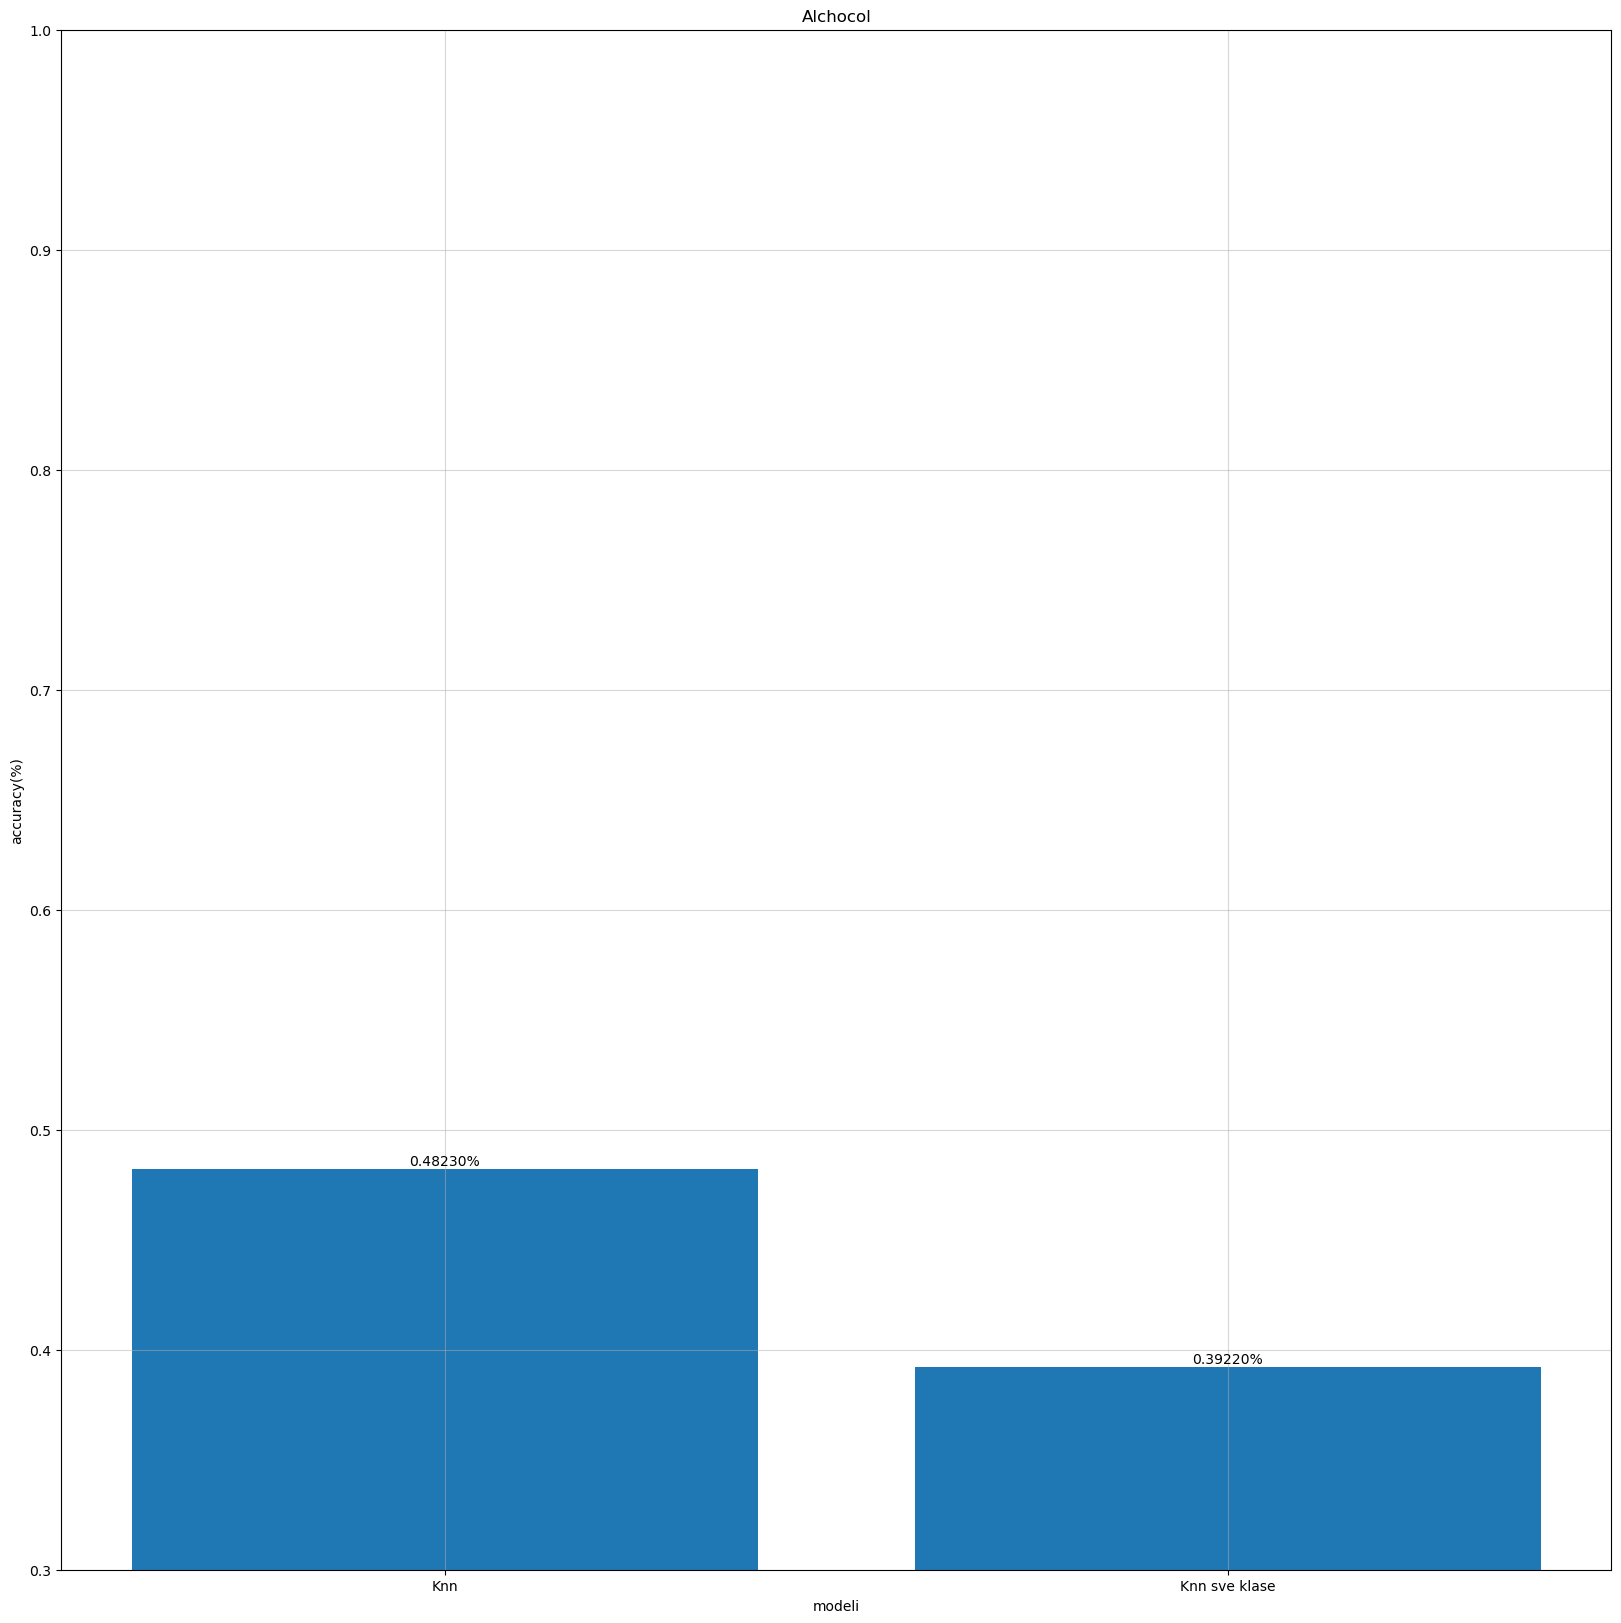

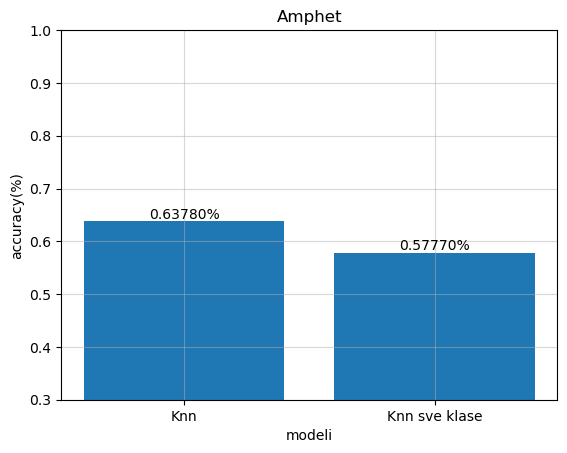

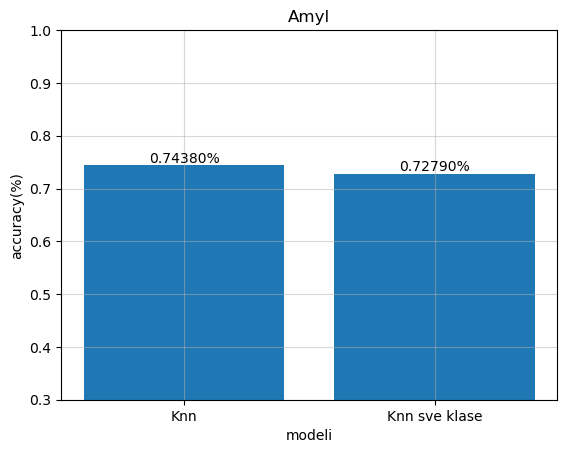

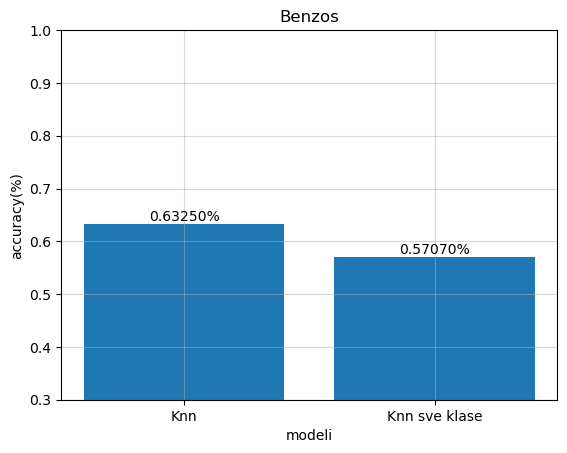

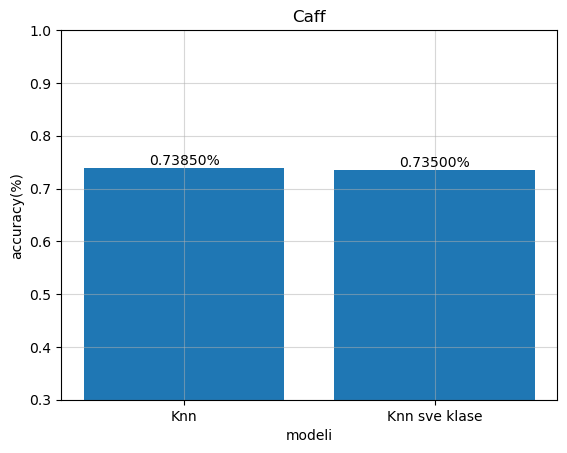

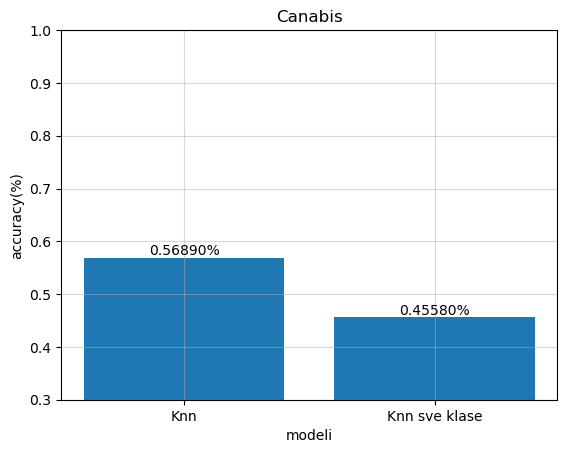

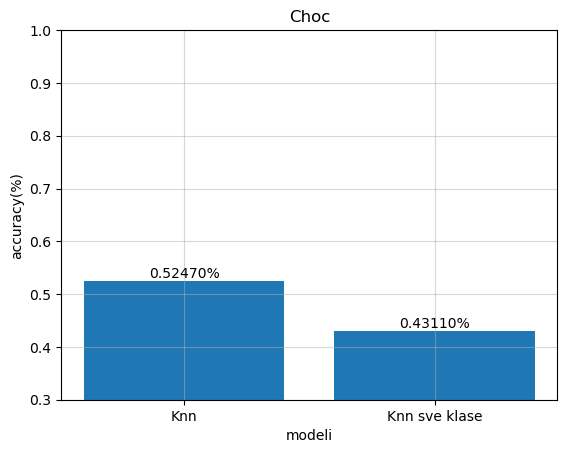

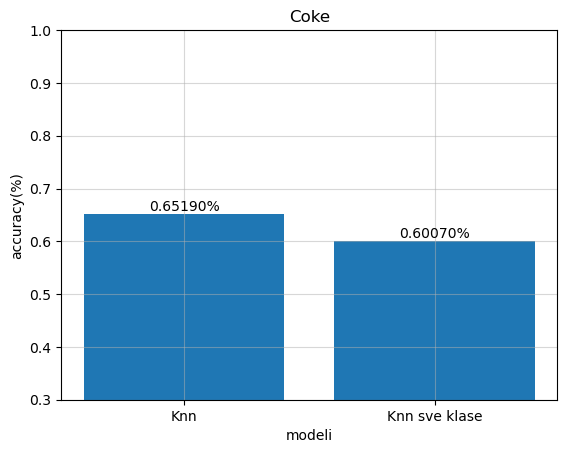

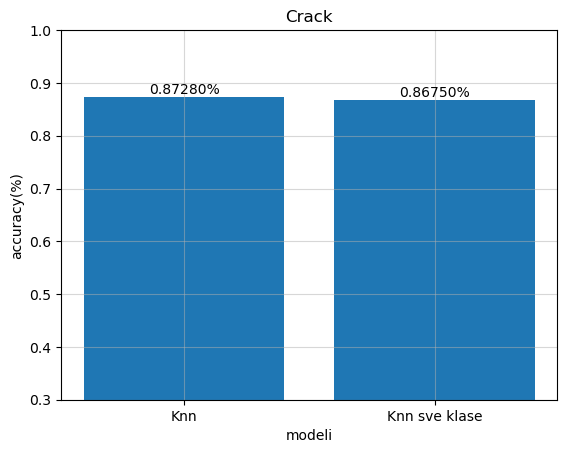

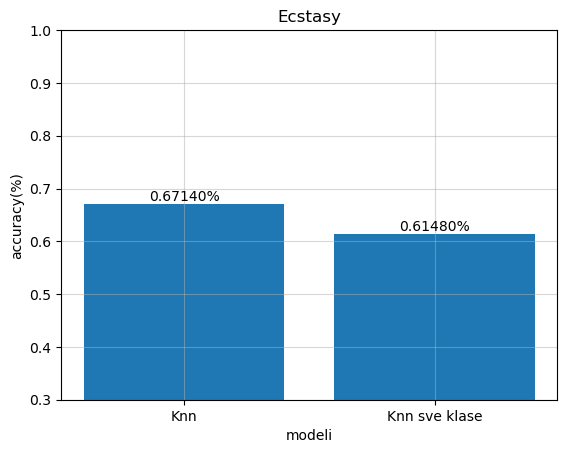

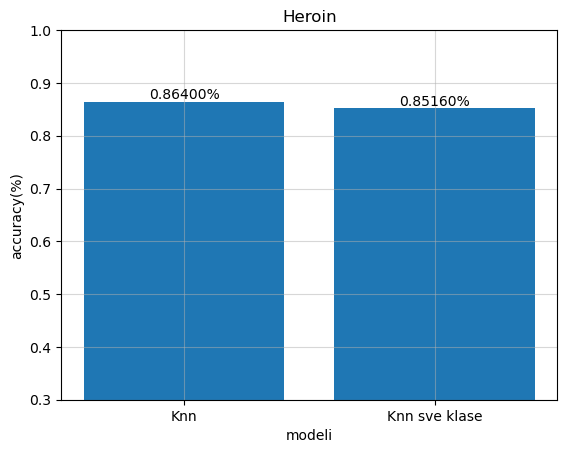

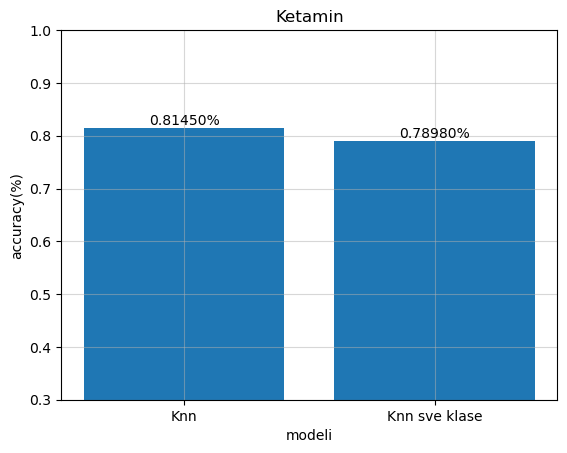

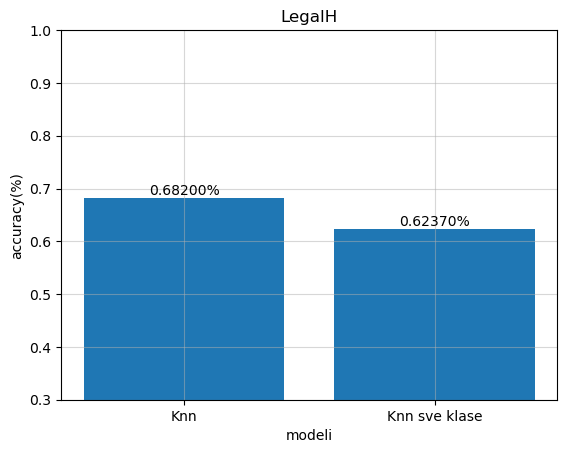

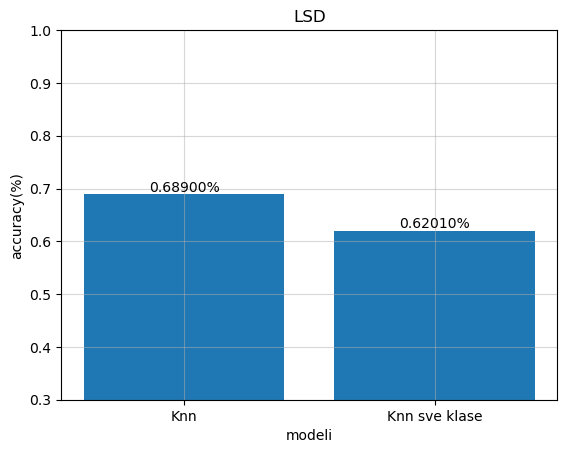

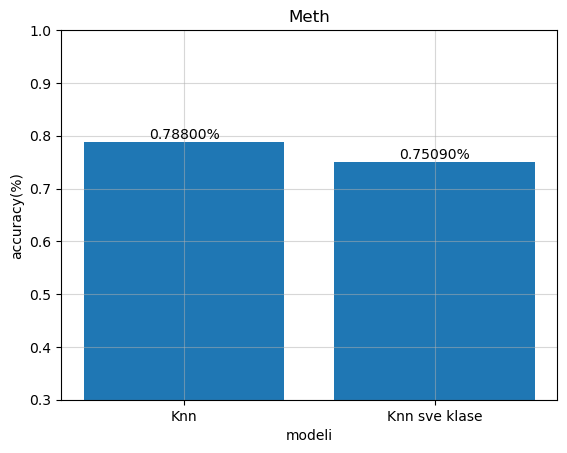

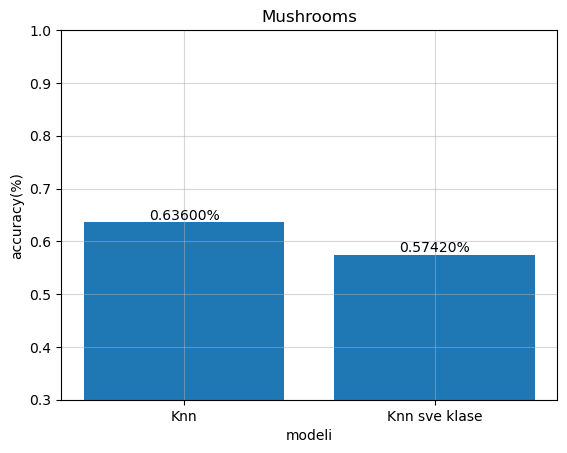

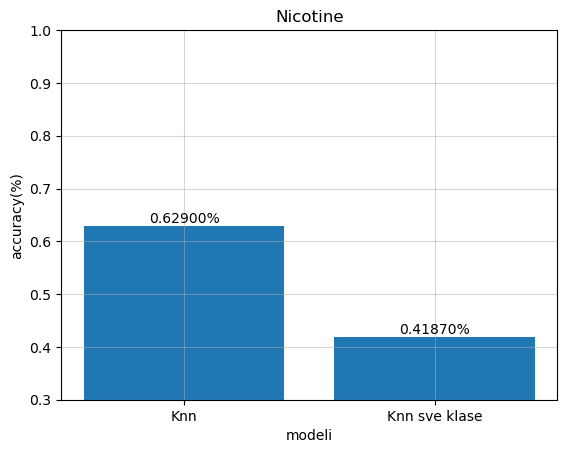

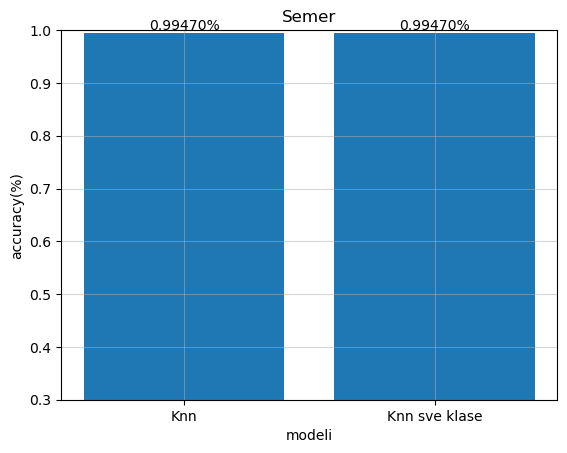

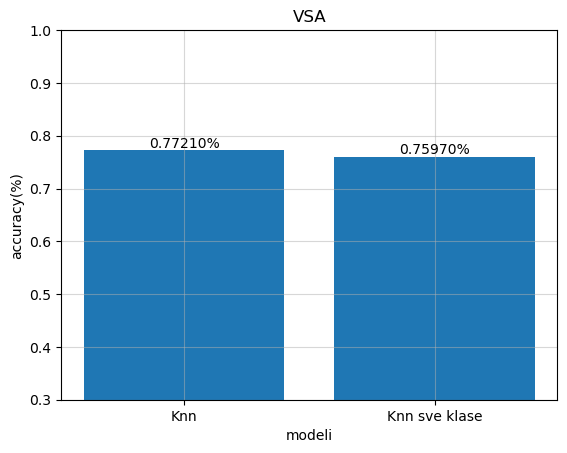

In [350]:
plt.figure(figsize = (20, 20))
for i in range(n):
    plt.title(f'{klase[i]}')
    vrednosti = [preciznosti_obicno[i], preciznosti_sve[i]]
    plt.bar(modeli, vrednosti)
    plt.grid(alpha = 0.5)
    plt.ylim(0.3, 1.0)
    for j, s in enumerate(vrednosti):
        plt.text(modeli[j], s, f'{s:.5f}%', ha='center', va='bottom')
    plt.xlabel('modeli')
    plt.ylabel('accuracy(%)')
    plt.show()


In [351]:
def prosek(niz):
    return sum(niz) / len(niz)
proseci = [prosek(preciznosti_obicno), prosek(preciznosti_sve)]

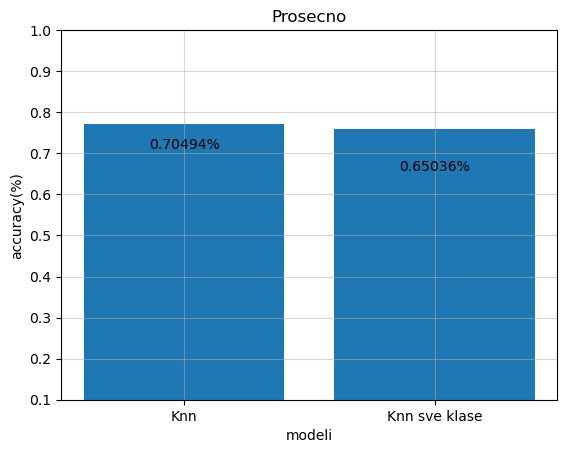

In [352]:
plt.title("Prosecno")
plt.bar(modeli, vrednosti)
plt.grid(alpha = 0.5)
plt.ylim(0.1, 1.0)
for j, s in enumerate(proseci):
    plt.text(modeli[j], s, f'{s:.5f}%', ha='center', va='bottom')
plt.xlabel('modeli')
plt.ylabel('accuracy(%)')
plt.show()

In [353]:
najbolji_parametri

{'algorithm': 'auto', 'n_neighbors': 18, 'weights': 'uniform'}

In [354]:
# eksport modela
knn = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 18, weights = 'uniform')

In [356]:
import joblib
joblib.dump(knn, 'KNN.pkl')

['KNN.pkl']